# Creating the network

Creating the network .gml file from the column given

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import ast
import json

In [67]:
df = pd.read_csv("../data/postings_parsed.csv")
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
print(len(df['skills']))
df.head()

123849


,job_id,company_name,description,skills_desc,zip_code,skills
0,921716,Corcoran Sawyer Smith,Job descriptionA leading real estate firm in N...,Requirements: \n\nWe are seeking a College or ...,8540.0,[planning]
1,1829192,NaN,"At Aspen Therapy and Wellness , we are committ...",NaN,80521.0,"[planning, communication, interpersonal]"
2,10998357,The National Exemplar,The National Exemplar is accepting application...,We are currently accepting resumes for FOH - A...,45202.0,"[organization, teamwork, communication]"
3,23221523,"Abrams Fensterman, LLP",Senior Associate Attorney - Elder Law / Trusts...,This position requires a baseline understandin...,11040.0,"[problem-solving, planning, communication, pla..."
4,35982263,NaN,Looking for HVAC service tech with experience ...,NaN,52601.0,[]


In [68]:
# Creating a network graph
G = nx.Graph()

# Iterate over each list of skills in the dataframe
for skill_list in df['skills']:
    skill_list = list(skill_list)
    # Add nodes and edges for every combination of skills in the list
    for skill1, skill2 in combinations(skill_list, 2):
        if G.has_edge(skill1, skill2):
            # Increment weight if edge already exists
            G[skill1][skill2]['weight'] += 1
        else:
            # Add edge with initial weight
            G.add_edge(skill1, skill2, weight=1)

# Export the graph to a GML file
nx.write_gml(G, '../graphs/skills_graph.gml')

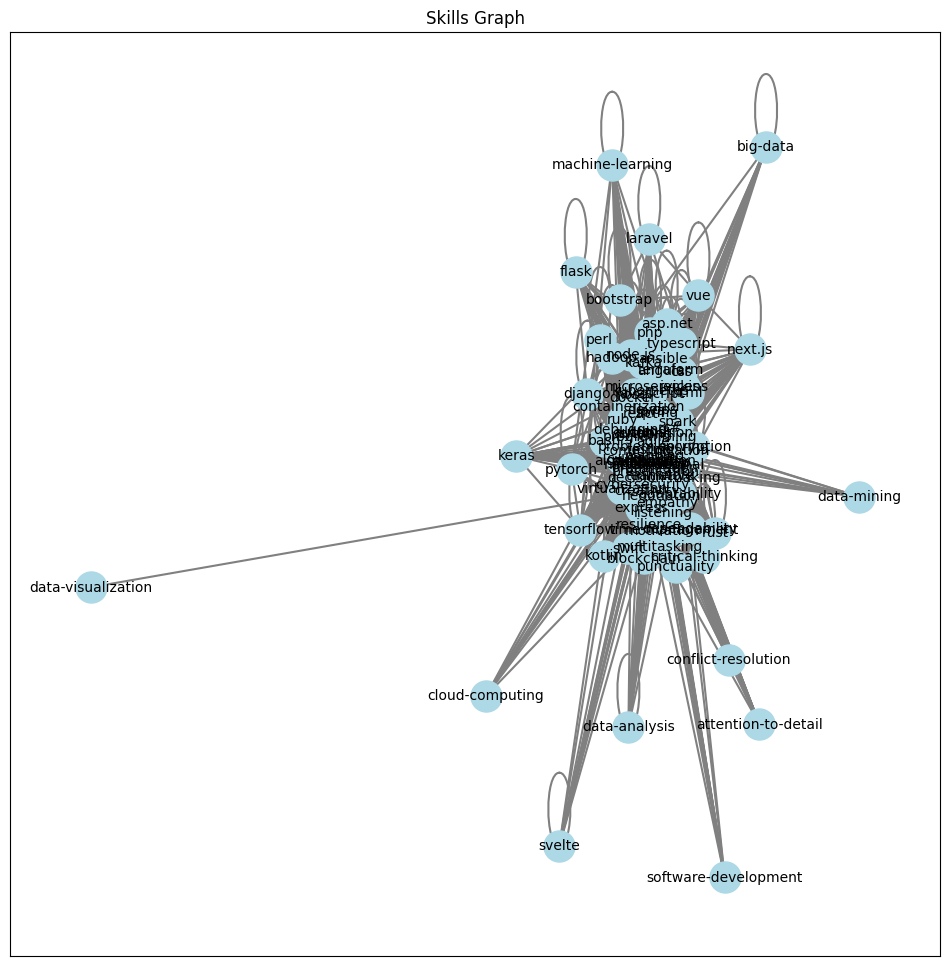

In [69]:
# Read the GML File and plot the graph
plt.figure(figsize=(12, 12))  # Set the figure size

# Draw the graph with a spring layout (which tries to position nodes in a visually pleasing way)
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.5, edge_color='gray')

# Draw the labels for each node
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Display the plot
plt.title("Skills Graph")
plt.show()

# Average Degree

In [70]:
# Printing the useful information of the graphs
G = G.to_undirected()

# Average degree
degrees = []
for node, deg in G.degree():
    degrees.append(deg)
average_degree = sum(degrees) / len(degrees)
print(f"Average degree of the graph: {average_degree}")

Average degree of the graph: 64.08510638297872


# Clustering Coefficient
### Average clustering coefficient

### Global clustering coefficient

In [71]:
# 1. Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")

# 2. Global clustering coefficient (Transitivity)
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient (Transitivity): {global_clustering}")

Average Clustering Coefficient: 0.8578052331848044
Global Clustering Coefficient (Transitivity): 0.818226200162734


# Betweenness Centrality

In this section, we will analyze the nodes with the highest betweenness centrality. This could give us information on which nodes are the most important in contributing to the shortest path lengths. 

In [72]:
# Calculate weighted betweenness centrality
betweenness_weighted = nx.betweenness_centrality(G, weight='weight')
sorted_betweenness = sorted(betweenness_weighted.items(), key=lambda x: x[1], reverse=True)
top_10 = sorted_betweenness[:10]
lowest_10 = sorted_betweenness[-10:]

print("\nTop 10 nodes with lowest betweenness centrality:")

for node, centrality in top_10:
    print(f"{node}: {centrality:.4f}")

print("\nLowest 10 nodes with lowest betweenness centrality:")
for node, centrality in lowest_10:
    print(f"{node}: {centrality:.4f}")


Top 10 nodes with lowest betweenness centrality:
machine-learning: 0.0776
software-development: 0.0757
keras: 0.0453
kotlin: 0.0388
r: 0.0385
pytorch: 0.0368
typescript: 0.0344
c#: 0.0332
asp.net: 0.0322
django: 0.0315

Lowest 10 nodes with lowest betweenness centrality:
microservices: 0.0009
planning: 0.0007
programming: 0.0007
docker: 0.0005
communication: 0.0003
agile: 0.0002
spring: 0.0001
interpersonal: 0.0000
collaboration: 0.0000
data-visualization: 0.0000


# Distance Metrics

Here, we will calculate the diameter and average path length of the graph and see if we can draw any conclusions. 

In [73]:
diameter = nx.diameter(G)  # Longest shortest path
avg_path_length = nx.average_shortest_path_length(G)

print(f"Diameter of the graph: {diameter}")
print(f"Average path length of the graph: {avg_path_length:.4f}")

Diameter of the graph: 3
Average path length of the graph: 1.3338


# Connectivity

Here, we will calculate the vertex connectivity, edge connectivity, and k_min.

In [74]:
k_v = nx.algorithms.connectivity.minimum_node_cut(G)

k_e = nx.algorithms.connectivity.minimum_edge_cut(G)

k_min = min(k_v, k_e)

# Print results
print(f"Vertex Connectivity: {k_v}")
print(f"Edge Connectivity: {k_e}")
print(f"k_min (minimum of vertex and edge connectivity): {k_min}")

Vertex Connectivity: {'creativity'}
Edge Connectivity: {('creativity', 'data-visualization')}
k_min (minimum of vertex and edge connectivity): {'creativity'}


# Nodes with highest degree

In [75]:
# Getting the most connected nodes

nodes_with_degrees = G.degree()

sorted_nodes = sorted(nodes_with_degrees, key=lambda x: x[1], reverse=True)

# Get the top 10 nodes with the highest degree
top_10_nodes = sorted_nodes[:10]

# Print the result
for node, degree in top_10_nodes:
    print(f"Node: {node}, Degree: {degree}")

Node: communication, Degree: 94
Node: problem-solving, Degree: 92
Node: leadership, Degree: 92
Node: organization, Degree: 91
Node: writing, Degree: 91
Node: innovation, Degree: 91
Node: testing, Degree: 91
Node: sql, Degree: 91
Node: collaboration, Degree: 90
Node: agile, Degree: 90


# Plotting by edge weights

Here, we will see which pairs of nodes have the highest edge weights

In [76]:
# Check if the graph has weights
if not nx.get_edge_attributes(G, "weight"):
    print("Graph does not have weights associated with edges.")
else:
    edges_with_weights = [(u, v, data["weight"]) for u, v, data in G.edges(data=True) if "weight" in data and u != v]
    highest_edges = sorted(edges_with_weights, key=lambda x: x[2], reverse=True)[:10]
    lowest_edges = sorted(edges_with_weights, key=lambda x: x[2])[:10]
    # Print metrics for highest-weight edges
    print("Top 10 highest-weight relationships:")
    print("Rank | Node Pair          | Weight | Degree(Node1, Node2)")
    for i, (u, v, weight) in enumerate(highest_edges, 1):
        print(f"{i:4} | ({u}, {v}) | {weight:.4f} | ({G.degree[u]}, {G.degree[v]})")

    # Print metrics for lowest-weight edges
    print("\nTop 10 lowest-weight relationships:")
    print("Rank | Node Pair          | Weight | Degree(Node1, Node2)")
    for i, (u, v, weight) in enumerate(lowest_edges, 1):
        print(f"{i:4} | ({u}, {v}) | {weight:.4f} | ({G.degree[u]}, {G.degree[v]})")

Top 10 highest-weight relationships:
Rank | Node Pair          | Weight | Degree(Node1, Node2)
   1 | (communication, leadership) | 29866.0000 | (94, 92)
   2 | (leadership, leadership) | 23321.0000 | (92, 92)
   3 | (communication, communication) | 22222.0000 | (94, 94)
   4 | (communication, organization) | 19386.0000 | (94, 91)
   5 | (communication, interpersonal) | 18568.0000 | (94, 85)
   6 | (planning, communication) | 17663.0000 | (88, 94)
   7 | (testing, testing) | 16941.0000 | (91, 91)
   8 | (organization, leadership) | 15843.0000 | (91, 92)
   9 | (planning, planning) | 15226.0000 | (88, 88)
  10 | (planning, leadership) | 14532.0000 | (88, 92)

Top 10 lowest-weight relationships:
Rank | Node Pair          | Weight | Degree(Node1, Node2)
   1 | (planning, laravel) | 1.0000 | (88, 36)
   2 | (planning, keras) | 1.0000 | (88, 29)
   3 | (communication, cloud-computing) | 1.0000 | (94, 11)
   4 | (interpersonal, machine-learning) | 1.0000 | (85, 35)
   5 | (interpersonal, pyt

# Plotting the graphs

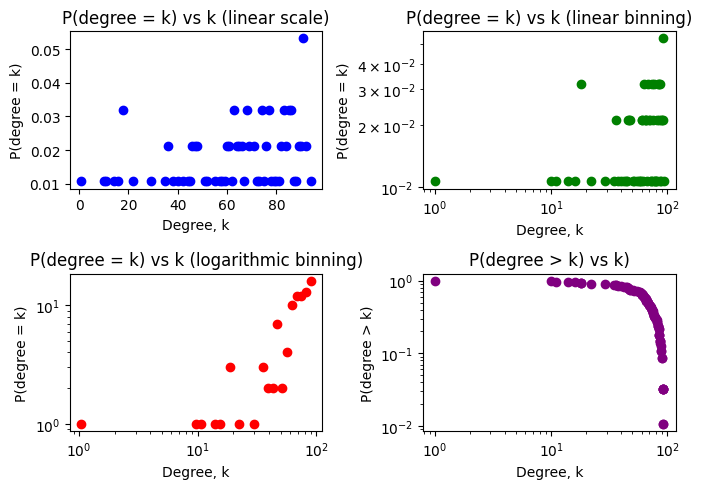

In [77]:
k_values, P_k = np.unique(degrees, return_counts=True)
P_k = P_k / sum(P_k)

# Creating subplot for the four different plots
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

# === 1. P(degree = k) as a function of k in linear scale ===
# This is equivalent to just plotting the graphs
axs[0, 0].scatter(k_values, P_k, color='blue')
axs[0, 0].set_xlabel('Degree, k')
axs[0, 0].set_ylabel('P(degree = k)')
axs[0, 0].set_title('P(degree = k) vs k (linear scale)')

# === 2. P(degree = k) in a log-log scale with linear binning
axs[0, 1].scatter(k_values, P_k, color='green')
# Allows me to log the x and the y graphs
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Degree, k')
axs[0, 1].set_ylabel('P(degree = k)')
axs[0, 1].set_title('P(degree = k) vs k (linear binning)')

# === 3. P(degree = k) in a log-log scale with log binning (x-axis)

# Creating bins on a logarithmic scale.
# This means that the width of the spaces increases
k_bins = np.logspace(np.log10(min(k_values)), np.log10(max(k_values)))
# hist: Counts the degrees within each bin
# bin_edges: Boundaries of each bin, so we only want to plot the middle point
hist, bin_edges = np.histogram(degrees, bins=k_bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

axs[1, 0].scatter(bin_centers, hist, color='red')
# Allows me to log the x and the y graphs
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Degree, k')
axs[1, 0].set_ylabel('P(degree = k)')
axs[1, 0].set_title('P(degree = k) vs k (logarithmic binning)')

# === 4. P(degree = k) in a log-log scale with log binning (x-axis)
# Sort degrees in descending order
sorted_degrees = np.sort(degrees)[::-1]
# Calculate the CCDF: P(degree > k) for each degree
# np.sum(sorted_degrees > k) is the CCDF.
ccdf = np.array([np.sum(sorted_degrees > k)
                for k in sorted_degrees]) / len(degrees)

# Plot the CCDF
axs[1, 1].scatter(sorted_degrees, ccdf, color='purple')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Degree, k')
axs[1, 1].set_ylabel('P(degree > k)')
axs[1, 1].set_title('P(degree > k) vs k)')

plt.tight_layout()
plt.show()
